1. 색상에 대해서 히스토그램 그리기
2. 색상에 대한 마스크 적용하기

In [10]:
import os
import numpy as np
import cv2

import matplotlib.pyplot as plt

In [11]:
path = '/home/kim/Desktop/AI_cours/data/wafer.jpg'

In [12]:
src = cv2.imread(path)

In [13]:
src_rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

In [14]:
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

In [15]:
src = src_gray

In [39]:
# cv2.calcHist(이미지리스트, 채널번호리스트, 마스크, 히스토그램크기리스트, 픽셀값범위리스트)
hist = cv2.calcHist([src], [0], None, [256], [0,256])
# 0번 채널, None: 마스크 설정이 None(전체 이미지 사용)
# [256] bin(계급구간)개수 (0~255 픽셀값을 256개 구간으로 나눔)

# 즉 히스토그램은 256x1 행렬 형태로 반환됨
# 각 값마다 해당 픽셀값을 가진 픽셀의 개수가 저장되어 있음

In [17]:
hist[0]

array([10619.], dtype=float32)

In [18]:
hist[255]

array([1.], dtype=float32)

In [45]:
np.max(hist)
# 인덱스 뽑기
np.argmax(hist)

np.int64(1)

In [47]:

hist[1,0] / hist.max()

np.float32(1.0)

In [ ]:
100 - (hist[1,0] / hist.max()) * 100

In [40]:
hist.shape

(256, 1)

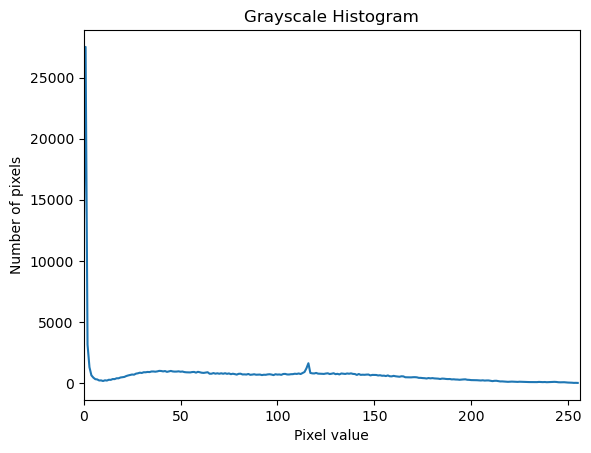

In [41]:
plt.plot(hist)
plt.xlim([0,256])
plt.title('Grayscale Histogram')
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
plt.show()

In [ ]:
src.ravel() # 1차원 배열로 변환

array([162, 126, 134, ..., 114, 108, 161], shape=(176400,), dtype=uint8)

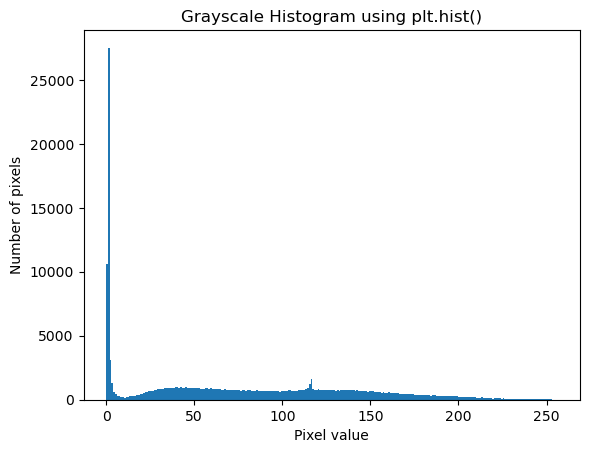

In [20]:
plt.hist(src.ravel(), bins=256, range=[0,256])
plt.title('Grayscale Histogram using plt.hist()')
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
plt.show()

In [42]:
hist[0,0]

np.float32(10619.0)

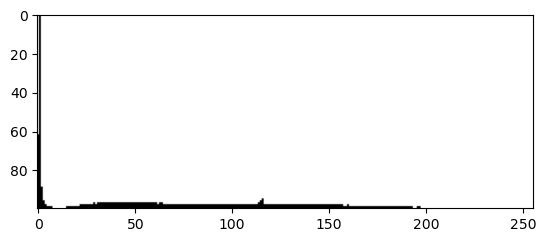

In [ ]:
image_bg = np.full((100,256),255,dtype=np.uint8)
for x in range(256):
    cv2.line(image_bg,(x,100), (x,100-int(hist[x,0]*100/hist.max())),0)

plt.imshow(image_bg,cmap='gray')
plt.show()

# x, y
# 이미지에서 array 행렬 일때 [y, x] 형태로 접근함
# cv에서 포인트는 (x, y) 형태로 접근함
# shape의 (y, x) 형태로 반환됨

마스크 (색상 마스크)

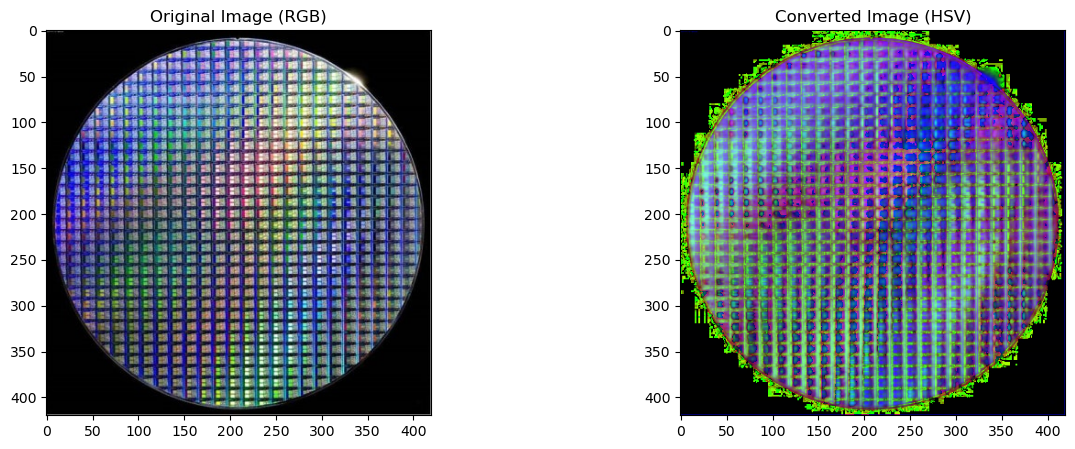

In [ ]:
# 색공간 (HSV)

image = cv2.imread(path)
cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image (RGB)')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# HSV(Hue 색, Saturation 채도, Value 명도)
axes[1].imshow(image_hsv)
axes[1].set_title('Converted Image (HSV)')
plt.show()

In [55]:
image_hsv.shape

(420, 420, 3)

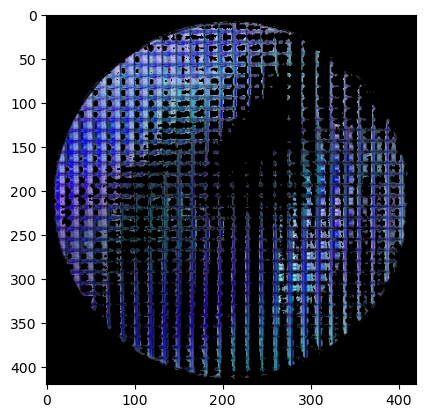

In [ ]:
lower_blue = np.array([90,50,50])
high_blue = np.array([130,255,255])

mask = cv2.inRange(image_hsv, lower_blue, high_blue) # 특정 범위 내에 있으면 255, 아니면 0

# bitwise_and(원본이미지, 원본이미지, mask=마스크이미지)
result = cv2.bitwise_and(image, image, mask=mask)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.imshow(result_rgb)
plt.show()

In [60]:
set(list(mask.ravel()))

{np.uint8(0), np.uint8(255)}